In [1]:
import keras
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
import PIL
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
non_demented = []
very_mild_demented = []
mild_demented = []
moderate_demented = []

for dirname, _, filenames in os.walk('./OASIS_DATA/Non_Demented'):
    for filename in filenames:
        non_demented.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('./OASIS_DATA/Very_mild_Dementia'):
    for filename in filenames:
        very_mild_demented.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('./OASIS_DATA/Mild_Dementia'):
    for filename in filenames:
        mild_demented.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('./OASIS_DATA/Moderate_Dementia'):
    for filename in filenames:
        moderate_demented.append(os.path.join(dirname, filename))

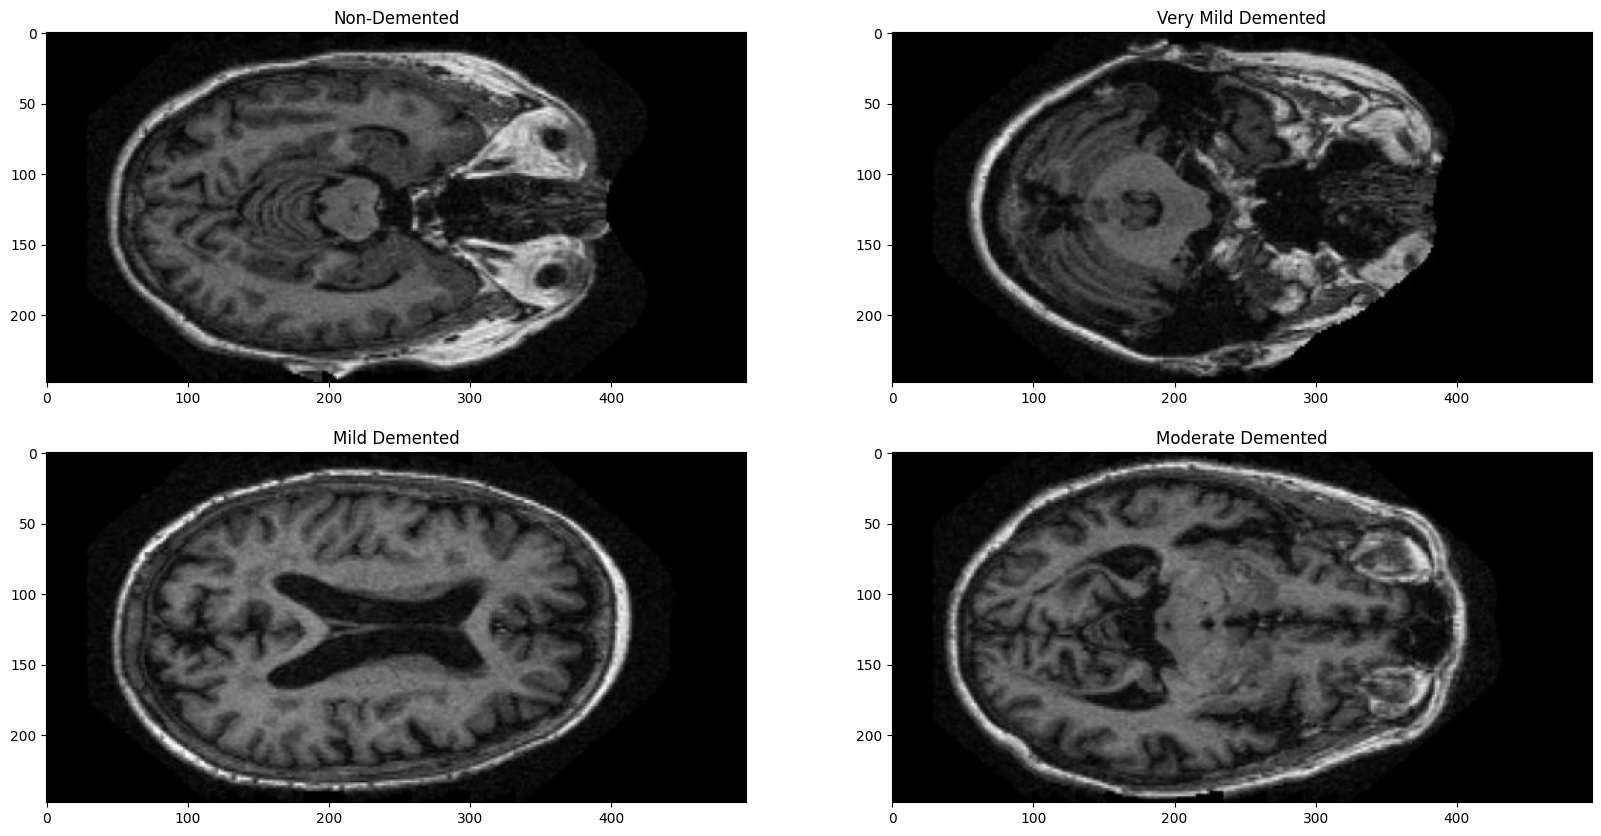

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10)) 

axes[0, 0].imshow(PIL.Image.open(str(non_demented[10])))
axes[0, 0].set_title('Non-Demented')

axes[0, 1].imshow(PIL.Image.open(str(very_mild_demented[20])))
axes[0, 1].set_title('Very Mild Demented')

axes[1, 0].imshow(PIL.Image.open(str(mild_demented[44])))
axes[1, 0].set_title('Mild Demented')

axes[1, 1].imshow(PIL.Image.open(str(moderate_demented[99])))
axes[1, 1].set_title('Moderate Demented')

plt.show()

In [4]:
print(len(non_demented))
print(len(mild_demented))
print(len(moderate_demented))
print(len(very_mild_demented))

67222
4997
488
13725


In [5]:
non_demented=non_demented[0:488]
mild_demented=mild_demented[0:488]
very_mild_demented=very_mild_demented[0:488]

In [6]:
print(len(non_demented))
print(len(mild_demented))
print(len(moderate_demented))
print(len(very_mild_demented))

488
488
488
488


In [7]:
# One Hot Encoding
# 0 -> non_demented
# 1 -> mild_dementia
# 2 -> moderate_dementia
# 3 -> very_mild_dementia
encoder= OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

OneHotEncoder()

# Data Preprocessing

In [8]:
data = []
result = []
for s in non_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        
for s in mild_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())
        
for s in moderate_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())

for s in very_mild_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())

In [9]:
X=np.array(data)

In [10]:
X.shape

(1952, 128, 128, 3)

In [11]:
y=np.array(result)
y=y.reshape(X.shape[0],4)
y=np.argmax(y, axis=1)
y

array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

# Splitting the data into training and testing

In [12]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
X_train.shape

(1561, 128, 128, 3)

In [14]:
X_test.shape

(391, 128, 128, 3)

# Creating Model

In [15]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=2,padding='Same',input_shape = (128,128,3)))
model.add(Conv2D(filters=32,kernel_size=2,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=2,padding='Same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=2,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128,kernel_size=2,padding='Same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=2,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4,activation='sigmoid'))

In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [17]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

## CNN Model Training

In [19]:
history_cnn= model.fit(X_train,y_train, validation_split=0.2,epochs=50,callbacks=[early_stopping],batch_size=32)

Epoch 1/50


39/39 [==============================] - 48s 1s/step - loss: 6.7408 - accuracy: 0.5873 - val_loss: 15.2688 - val_accuracy: 0.2332
Epoch 2/50
39/39 [==============================] - 36s 933ms/step - loss: 0.2879 - accuracy: 0.8950 - val_loss: 4.1421 - val_accuracy: 0.3578
Epoch 3/50
39/39 [==============================] - 34s 884ms/step - loss: 0.1441 - accuracy: 0.9447 - val_loss: 0.7804 - val_accuracy: 0.7604
Epoch 4/50
39/39 [==============================] - 33s 854ms/step - loss: 0.0749 - accuracy: 0.9768 - val_loss: 0.2953 - val_accuracy: 0.8850
Epoch 5/50
39/39 [==============================] - 35s 908ms/step - loss: 0.0592 - accuracy: 0.9808 - val_loss: 0.1415 - val_accuracy: 0.9681
Epoch 6/50
39/39 [==============================] - 35s 890ms/step - loss: 0.0400 - accuracy: 0.9848 - val_loss: 0.1230 - val_accuracy: 0.9744
Epoch 7/50
39/39 [==============================] - 33s 840ms/step - loss: 0.0300 - accuracy: 0.9888 - val_loss: 0.1266 - val_accuracy: 0.9649

In [20]:
cnn_accuracy = model.evaluate(X_test,y_test)
print(f'Accuracy of CNN: {cnn_accuracy[1]*100}%')

13/13 [==============================] - 2s 138ms/step - loss: 9.0245e-08 - accuracy: 1.0000
Accuracy of CNN: 100.0%


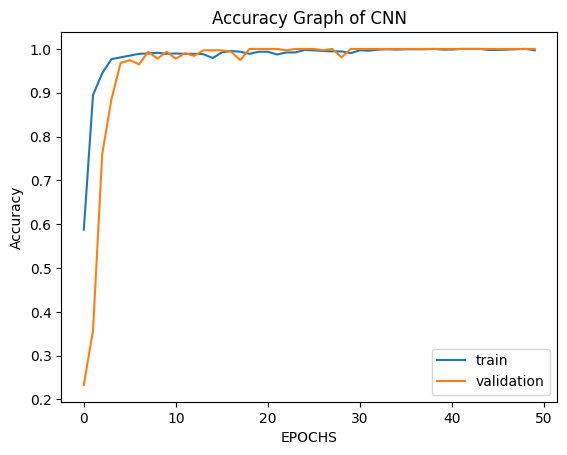

In [21]:
%matplotlib inline 
plt.plot(history_cnn.history['accuracy'],label='train')
plt.plot(history_cnn.history['val_accuracy'],label='validation')
plt.title('Accuracy Graph of CNN')
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

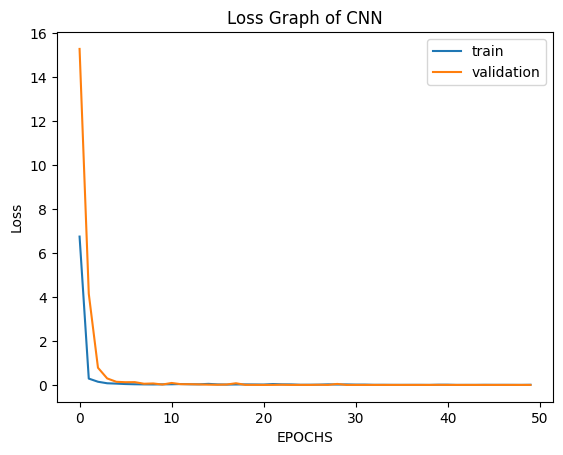

In [22]:
plt.plot(history_cnn.history['loss'],label='train')
plt.plot(history_cnn.history['val_loss'],label='validation')
plt.xlabel('EPOCHS')
plt.ylabel('Loss')
plt.title('Loss Graph of CNN')
plt.legend()
plt.show()

# RNN Model

In [23]:
from keras.layers import LSTM

In [24]:
model.pop()

In [25]:
input_shape = model.layers[-1].output_shape[1:]

In [26]:
from keras.layers import Reshape, TimeDistributed
model.add(Reshape((1,) + input_shape))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(units=128, activation='relu', return_sequences=True))
model.add(LSTM(units=64, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
history_rnn = model.fit(X_train, y_train, validation_split=0.2, epochs=50, callbacks=[early_stopping], batch_size=32)

Epoch 1/50
39/39 [==============================] - 39s 910ms/step - loss: 0.2687 - accuracy: 0.9151 - val_loss: 0.0198 - val_accuracy: 0.9968
Epoch 2/50
39/39 [==============================] - 35s 901ms/step - loss: 0.0635 - accuracy: 0.9800 - val_loss: 5.6576e-04 - val_accuracy: 1.0000
Epoch 3/50
39/39 [==============================] - 34s 868ms/step - loss: 0.0472 - accuracy: 0.9816 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 4/50
39/39 [==============================] - 35s 907ms/step - loss: 0.0170 - accuracy: 0.9968 - val_loss: 0.1924 - val_accuracy: 0.9776
Epoch 5/50
39/39 [==============================] - 38s 980ms/step - loss: 0.0164 - accuracy: 0.9944 - val_loss: 3.5453e-05 - val_accuracy: 1.0000
Epoch 6/50
39/39 [==============================] - 37s 962ms/step - loss: 0.0128 - accuracy: 0.9952 - val_loss: 1.0218e-04 - val_accuracy: 1.0000
Epoch 7/50
39/39 [==============================] - 31s 782ms/step - loss: 0.0087 - accuracy: 0.9952 - val_loss: 5.7129e-05 - val_

In [29]:
rnn_accuracy = model.evaluate(X_test, y_test)
print(f'accuracy of RNN: {rnn_accuracy[1]*100}%')

13/13 [==============================] - 2s 143ms/step - loss: 0.0102 - accuracy: 0.9949
accuracy of RNN: 99.48849081993103%


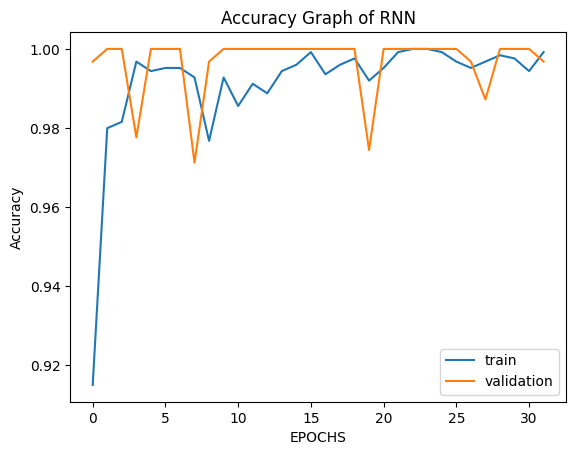

In [30]:
plt.plot(history_rnn.history['accuracy'], label='train')
plt.plot(history_rnn.history['val_accuracy'], label='validation')
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph of RNN')
plt.legend()
plt.show()

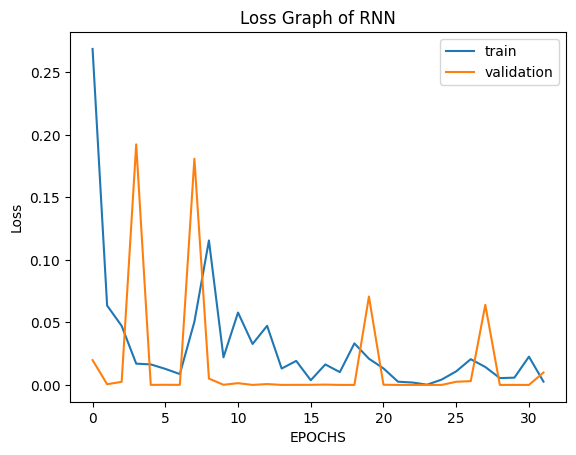

In [31]:
plt.plot(history_rnn.history['loss'], label='train')
plt.plot(history_rnn.history['val_loss'], label='validation')
plt.xlabel('EPOCHS')
plt.ylabel('Loss')
plt.title('Loss Graph of RNN')
plt.legend()
plt.show()